# GSoC 2024 ML4SCI QMLHEP Task Submission

**Name:** Haemanth Velmurugan <br>
**Email:** haemanth10@gmail.com

### Task 1

### 1. Implement a simple quantum operation with Cirq or Pennylane
* With $5$ qubits
* Apply Hadamard operation on every qubit
* Apply CNOT operation on $(0,1), (1,2), (2,3), (3,4)$
* SWAP $(0, 4)$
* Rotate $X$ with $\pi/2$ on any qubit
* Plot the circuit

While I am familiar with both Cirq and Pennylane, I have chosen Pennylane framework for this Task.

In [2]:
import pennylane as qml
import pennylane.numpy as np

In [4]:
# With 5 qubits
n_qubits = 5
dev = qml.device('default.qubit', wires=n_qubits)

In [27]:
@qml.qnode(dev)
def circuit():
    
    # Apply Hadamard operation on every qubit
    for i in range(n_qubits):
        qml.Hadamard(i)
    
    # Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
    for i in range(n_qubits-1):
        qml.CNOT([i, i+1])
        
    # SWAP (0, 4)
    qml.SWAP([0,4])
    
    # Rotate X with pi/2 on any qubit - let us choose qubit 0 itself
    qml.RX(np.pi/2, wires=0)
    
    return qml.state()

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

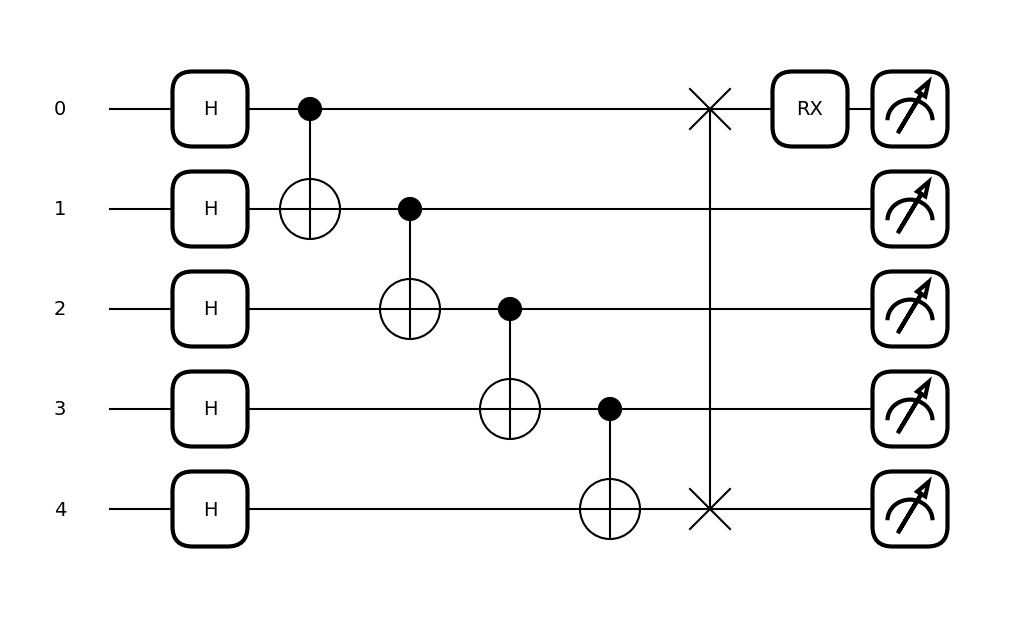

In [28]:
qml.draw_mpl(circuit)()

#### Quantum State output of the circuit

In [29]:
circuit()

tensor([0.125-0.125j, 0.125-0.125j, 0.125-0.125j, 0.125-0.125j,
        0.125-0.125j, 0.125-0.125j, 0.125-0.125j, 0.125-0.125j,
        0.125-0.125j, 0.125-0.125j, 0.125-0.125j, 0.125-0.125j,
        0.125-0.125j, 0.125-0.125j, 0.125-0.125j, 0.125-0.125j,
        0.125-0.125j, 0.125-0.125j, 0.125-0.125j, 0.125-0.125j,
        0.125-0.125j, 0.125-0.125j, 0.125-0.125j, 0.125-0.125j,
        0.125-0.125j, 0.125-0.125j, 0.125-0.125j, 0.125-0.125j,
        0.125-0.125j, 0.125-0.125j, 0.125-0.125j, 0.125-0.125j], requires_grad=True)

#### Probabilities of observing basis states 

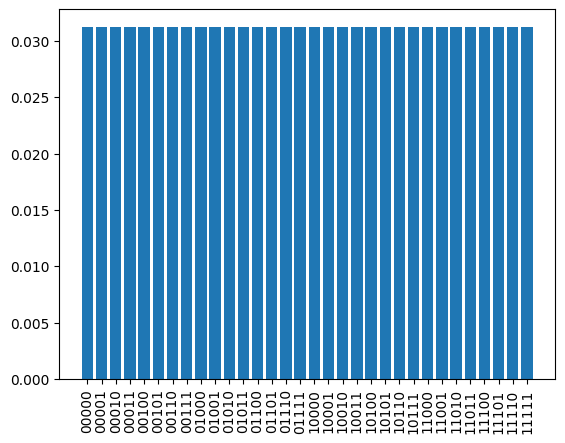

In [40]:
import matplotlib.pyplot as plt
statevector = circuit()
basis_states = ["{0:05b}".format(i) for i in range(2**n_qubits)]
probabilities = np.square(np.abs(statevector))
plt.bar(basis_states, probabilities)
plt.xticks(rotation=90)
plt.show()

**Explanation:** The circuit given first applies $H$ gate on all $5$ qubits which gives us an equal superposition of all possible $2^5 = 32$ states. The $CNOT$ gates will have no effect as the state of all qubits ($|+\rangle$ state) is the eigenvector of the $X$ basis and consequently a $CNOT$ or Controlled-Pauli-X gate on $|+\rangle$ state yields the $|+\rangle$ state itself. Similarly SWAP has no effect since qubits $0$ and $4$ are both in $|+\rangle$ states (the same state). Finally, $RX$ gate also acts on the $|+\rangle$ state, which is its eigenvector and hence applies only a global phase to the states which is immeasureable. As can be seen in the above plot, all probabilities are equal to $\frac{1}{2^5} = 0.03125$ irrespective of the phase.

### 2. Implement a second circuit with a framework of your choice:
* Apply a Hadmard gate to the first qubit
* Rotate the second qubit by $\pi/3$ around $X$
* Apply Hadamard gate to the third and fourth qubit
* Perform a swap test between the states of the first and second qubit $|q_1q_2\rangle$ and the third and fourth qubit $|q_3q_4\rangle$

I have chosen the Cirq framework for this Task

In [58]:
import cirq
from cirq import LineQubit, Circuit, H, Rx, CSWAP

In [63]:
qubits = [LineQubit(i) for i in range(6)]
circuit = Circuit()

# Apply a Hadmard gate to the first qubit
circuit.append(H(qubits[0]))

# Rotate the second qubit by 𝜋/3 around X
circuit.append(Rx(rads=np.pi/3)(qubits[1]))

# Apply Hadamard gate to the third and fourth qubit
circuit.append([H(qubits[2]), H(qubits[3])])

In [64]:
circuit

0: ───H────────────

1: ───Rx(0.333π)───

2: ───H────────────

3: ───H────────────

#### SWAP Test

In [65]:
# circuit.append(barrier)

# Perform a swap test between the states of the first and second qubit |q1q2⟩
circuit.append(H(qubits[4]))
circuit.append(CSWAP(qubits[4],qubits[0],qubits[1]))
circuit.append(H(qubits[4]))

# Perform a swap test between the states of the third and fourth qubit |q3q4⟩
circuit.append(H(qubits[5]))
circuit.append(CSWAP(qubits[5],qubits[2],qubits[3]))
circuit.append(H(qubits[5]))

In [66]:
circuit

┌──┐
0: ───H─────────────×─────────
                    │
1: ───Rx(0.333π)────×─────────
                    │
2: ───H─────────────┼×────────
                    ││
3: ───H─────────────┼×────────
                    ││
4: ───H─────────────@┼────H───
                     │
5: ───H──────────────@────H───
                   └──┘

In [67]:
# Measure only the SWAP test qubits
circuit.append(cirq.measure(*qubits[4:], key='result'))

sim = cirq.Simulator()
samples = sim.run(circuit, repetitions=1024)
print(samples.histogram(key='result'))

Counter({0: 764, 2: 260})


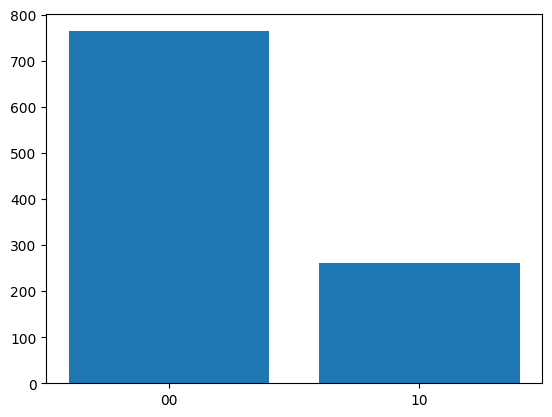

In [70]:
counts = samples.histogram(key='result')
basis_states = ["{0:02b}".format(i) for i in counts]
plt.bar(basis_states, counts.values())
plt.show()

**Explanation:**

The output state is |00\rangle + |10\rangle = (|0\rangle + |1\rangle)|0\rangle. Since first and third qubit are both in the |+\rangle state, SWAP test returns 0 for the second qubit measured as the two states are the same. Since the second and fourth qubits are in different states, the first qubit measured produces a superposition state other than |0\rangle indicating that the two states are different. 